# **Regularization (L2):** Ridge Regression (**Gradient Descent**)

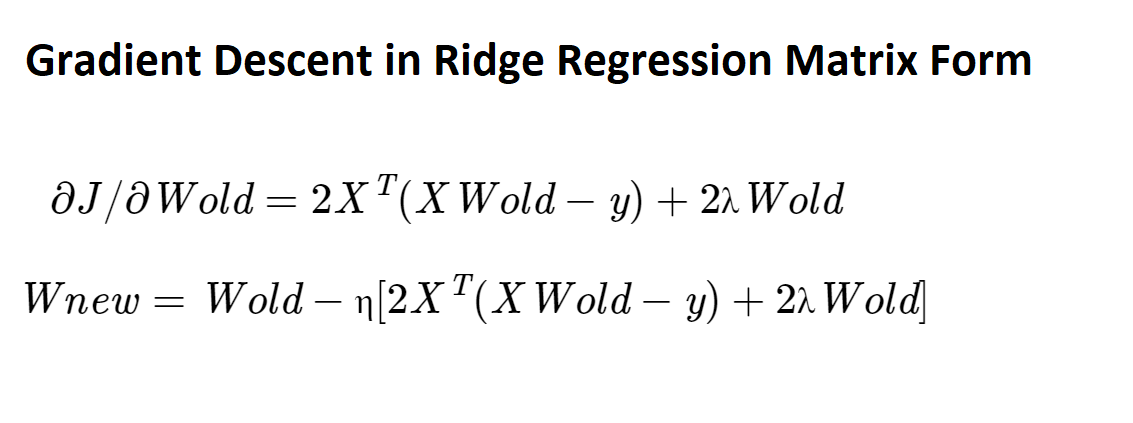

In [1]:
from IPython.display import Image
Image(filename='Ridge_Gradient_Descent.png')

In [6]:
from sklearn.linear_model import SGDRegressor
from sklearn.datasets import load_diabetes
from sklearn.metrics import r2_score
import numpy as np

In [3]:
X,y = load_diabetes(return_X_y=True)

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=4)

## SGD Regressor

In [7]:
reg = SGDRegressor(penalty="l2", max_iter=500, eta0=0.1, learning_rate="constant", alpha=0.001)

In [10]:
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
print(f"R2 Score: {r2_score(y_test,y_pred)}")
print(reg.coef_)
print(reg.intercept_)

R2 Score: 0.45107005867727756
[  50.24735473 -148.83354835  363.52425095  265.63765755   -3.7524399
  -55.97101526 -169.01189455  138.61169584  323.45724924  104.96856431]
[163.25900299]


## Ridge with Gradient Descent (Sklearn)

In [11]:
from sklearn.linear_model import Ridge
reg = Ridge(alpha=0.001, max_iter=500, solver="sparse_cg")

# Gradient Descent Solvers: ‘sparse_cg’, ‘sag’, ‘saga’
# Ordinary Least Square Solvers: ‘svd’, ‘cholesky’, ‘lsqr’

In [12]:
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
print(f"R2 Score: {r2_score(y_test,y_pred)}")
print(reg.coef_)
print(reg.intercept_)

R2 Score: 0.4625010162127753
[  34.52193446 -290.84083287  482.40182619  368.06787818 -852.44871792
  501.59161715  180.1111458   270.76335767  759.73536027   37.49136755]
151.10198520580585


## Ridge with Gradient Descent (Scratch)

In [16]:
class MeraRidgeGD:
    
    def __init__(self, epochs, learning_rate, alpha=0.1):
        
        self.epochs = epochs
        self.learning_rate = learning_rate
        self.alpha = alpha
        self.coef_ = None
        self.intercept_ = None
        
    def fit(self,X_train,y_train):
        
        self.coef_ = np.ones(X_train.shape[1])
        self.intercept_ = 0
        thetha = np.insert(self.coef_, 0, self.intercept_)

        X_train = np.insert(X_train,0,1,axis=1)

        for i in range(self.epochs):
            thetha_der = np.dot(X_train.T, X_train).dot(thetha) - np.dot(X_train.T,y_train) + self.alpha*thetha
            thetha = thetha - self.learning_rate*thetha_der
    
        self.intercept_ = thetha[0]
        self.coef_ = thetha[1:]
    
    def predict(self,X_test):
        return np.dot(X_test,self.coef_) + self.intercept_

In [17]:
reg = MeraRidgeGD(epochs=500, alpha=0.001, learning_rate=0.005)

In [18]:
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
print(f"R2 Score: {r2_score(y_test,y_pred)}")
print(reg.coef_)
print(reg.intercept_)

R2 Score: 0.4738018280260913
[  46.65050914 -221.3750037   452.12080647  325.54248128  -29.09464178
  -96.47517735 -190.90017011  146.32900372  400.80267299   95.09048094]
150.86975316713477
